# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
#### Add your code here ####

working_dir = "/content/drive/My Drive/Colab Notebooks/Advance Computer Vision/Face_Detection"
os.chdir(working_dir)

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
# data = #### Add your code here ####

data = np.load("./Copy of images.npy", allow_pickle=True)

In [0]:
type(data)

numpy.ndarray

In [0]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [4]:
#### Add your code here ####

data.view()[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

In [0]:
data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224            #### Add your code here ####
IMAGE_HEIGHT = 224           #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [5]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [0]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [0]:
type(masks)

numpy.ndarray

In [0]:
#### Add your code here ####
masks.shape

(409, 224, 224)

In [0]:
masks.shape[0]

409

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  [ 0.65490198  0.78039217  0.90588236]
  ...
  [ 0.72549021  0.79607844  0.9137255 ]
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]]

 [[ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  ...
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]]

 [[ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  [ 0.64705884  0.77254903  0.89803922]
  ...
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]
  [ 0.71764708  0.78823531  0.90588236]]

 ...

 [[-0.41960782 -0.34901959 -0.78823531]
  [-0.41176468 -0.33333331 -0.80392158]
  [-0.31764704 -0.27843136 -0.78039217]
  ...
  [ 0.28627455  0.09803927 -0.02745098]
  [ 0.7019608   0.67058825  0.66274512]
  [ 0.68627453  0.72549021  0.77254903]]

 [

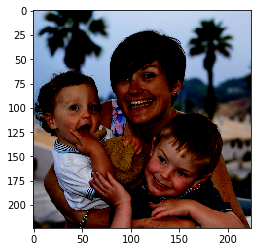

In [6]:
from matplotlib import pyplot
n = 400
print(X_train[n])
pyplot.imshow(X_train[n])

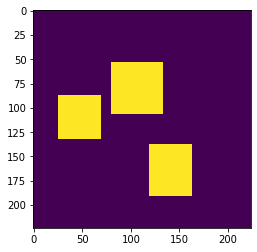

In [0]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
import cv2

In [0]:
# checking MobileNet model summary to get an idea of each layers
model = MobileNet()

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None

In [0]:
# for i, layer in enumerate(model.layers):
#   print(i, layer.name)

In [0]:
def create_model(trainable=True):
    # model = #### Add your code here ####
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), 
                      include_top=False, alpha=1.0, weights='imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####

    # getting the layers from mobilenet network
    conv_pw_13_relu = model.get_layer("conv_pw_13_relu").output
    conv_pw_12_relu = model.get_layer("conv_pw_12_relu").output
    conv_pw_11_relu = model.get_layer("conv_pw_11_relu").output
    conv_pw_10_relu = model.get_layer("conv_pw_10_relu").output
    conv_pw_9_relu = model.get_layer("conv_pw_9_relu").output
    conv_pw_8_relu = model.get_layer("conv_pw_8_relu").output
    conv_pw_7_relu = model.get_layer("conv_pw_7_relu").output
    conv_pw_6_relu = model.get_layer("conv_pw_6_relu").output
    conv_pw_5_relu = model.get_layer("conv_pw_5_relu").output
    conv_pw_4_relu = model.get_layer("conv_pw_4_relu").output
    conv_pw_3_relu = model.get_layer("conv_pw_3_relu").output
    conv_pw_2_relu = model.get_layer("conv_pw_2_relu").output
    conv_pw_1_relu = model.get_layer("conv_pw_1_relu").output
    input_1 = model.layers[0].output

    
    # Adding Unet layers
    # Each set will have 1 upsampling, then concat with the mobilenet layers having same shape
    # followed by 2 conved layers with extra parameters

    up2 = UpSampling2D()(conv_pw_13_relu)
    concat1 = Concatenate()([up2, conv_pw_11_relu])
    new_conv15 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(concat1)
    new_conv15 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(new_conv15)

    up3 = UpSampling2D()(concat1)
    concat2 = Concatenate()([up3, conv_pw_5_relu])
    new_conv16 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(concat2)
    new_conv16 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(new_conv16)

    up4 = UpSampling2D()(concat2)
    concat3 = Concatenate()([up4, conv_pw_3_relu])
    new_conv17 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(concat3)
    new_conv17 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(new_conv17)

    up5 = UpSampling2D()(concat3)
    concat4 = Concatenate()([up5, conv_pw_1_relu])
    new_conv17 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(concat4)
    new_conv17 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(new_conv17)

    up6 = UpSampling2D()(concat4)
    concat5 = Concatenate()([up6, input_1])

    outputs = Conv2D(1, kernel_size=1, activation="sigmoid")(concat5)
    outputs = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(outputs)

    # #### Add your code here ####
    return Model(inputs=model.input, outputs=outputs)

### Call the create_model function

In [13]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(True)

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [8]:
from keras import backend as K

def dice_coefficient(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    n = K.sum(y_true_f * y_pred_f)
    d = K.sum(y_true_f) + K.sum(y_pred_f)
    return n / (d + K.epsilon())

Using TensorFlow backend.


### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
from tensorflow.keras.optimizers import Adam
# optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer="adam", metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-7, verbose=1, mode="min")

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [0]:
# X_tr: X_train
# X_v: X_val
# y_tr: y_train
# y_v: y_val

# X_tr, X_v, y_tr, y_v = train_test_split(X_train, masks, test_size=0.3, random_state=9)

In [0]:
# print(X_tr.shape)
# print(X_v.shape)
# print(y_tr.shape)
# print(y_v.shape)

(286, 224, 224, 3)
(123, 224, 224, 3)
(286, 224, 224)
(123, 224, 224)


### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
#### Add your code here ####

EPOCHS = 100
BATCH_SIZE = 8
callbacks = [checkpoint, reduce_lr, stop]


# model.fit(X_tr,y_tr, validation_data=(X_v,y_v), epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle='batch', callbacks=callbacks, verbose=1)

model.fit(X_train, masks, validation_split=0.3, 
          epochs=EPOCHS, batch_size=BATCH_SIZE, 
          shuffle='batch', 
          callbacks=callbacks, 
          verbose=1)

Train on 286 samples, validate on 123 samples
Epoch 1/100

Epoch 00001: loss did not improve from 0.80234
  8/286 [..............................] - ETA: 32s - loss: 0.8869 - dice_coefficient: 0.4339
Epoch 00001: loss did not improve from 0.80234
 16/286 [>.............................] - ETA: 29s - loss: 0.8620 - dice_coefficient: 0.4444
Epoch 00001: loss did not improve from 0.80234
 24/286 [=>............................] - ETA: 28s - loss: 0.8746 - dice_coefficient: 0.4424
Epoch 00001: loss improved from 0.80234 to 0.79714, saving model to model-0.80.h5
 32/286 [==>...........................] - ETA: 32s - loss: 0.8552 - dice_coefficient: 0.4497
Epoch 00001: loss did not improve from 0.79714
 40/286 [===>..........................] - ETA: 30s - loss: 0.8511 - dice_coefficient: 0.4524
Epoch 00001: loss did not improve from 0.79714
 48/286 [====>.........................] - ETA: 28s - loss: 0.8566 - dice_coefficient: 0.4506
Epoch 00001: loss did not improve from 0.79714
 56/286 [====

### Get the predicted mask for a sample image   (3 marks)

In [0]:
WEIGHTS_FILE = "model-0.76.h5"

model = create_model(True)
model.load_weights(WEIGHTS_FILE)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


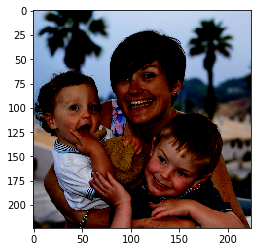

In [16]:
n = 400
sample_image = X_train[n]

#### Add your code here ####
pyplot.imshow(sample_image)


In [0]:
image_height, image_width, _ = sample_image.shape
img = cv2.resize(sample_image, (IMAGE_HEIGHT, IMAGE_HEIGHT), 3)
scaled = preprocess_input(np.array(img, dtype=np.float32))
# scaled_exp = np.expand_dims(scaled, axis=1)
# scaled_v = np.vectorize(scaled)

bbox_pred = model.predict(x=np.array([img]))[0]



x0 = ((bbox_pred[0]) * image_width / IMAGE_HEIGHT)
# x0 = x0.astype(int)
y0 = ((bbox_pred[1]) * image_height / IMAGE_HEIGHT)
# y0 = y0.astype(int)
x1 = ((bbox_pred[2]) * image_width / IMAGE_HEIGHT)
# x1 = x1.astype(int)
y1 = ((bbox_pred[3]) * image_height / IMAGE_HEIGHT)
# y1 = y1.astype(int)

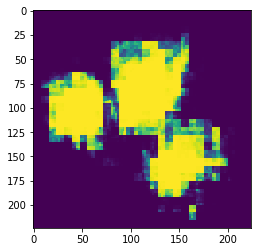

In [0]:
pyplot.imshow(bbox_pred)

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


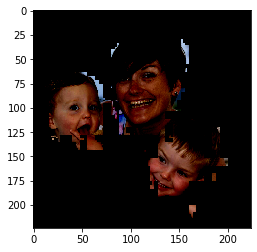

In [18]:
unscaled = X_train[n]

image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT),3)

feat_scaled = preprocess_input(np.array(unscaled, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

pyplot.imshow(out_image)
# cv2.imshow("Predicted Mask", out_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

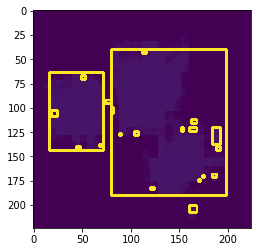

In [20]:
from google.colab.patches import cv2_imshow
THRESHOLD = 0.8
EPSILON = 0.02



output = np.zeros(sample_image.shape[:2], dtype=np.uint8)
for i in range(bbox_pred.shape[1]):
    for j in range(bbox_pred.shape[0]):
        if bbox_pred[i][j] > THRESHOLD:
            x = int(j * sample_image.shape[1] / IMAGE_WIDTH)
            y = int(i * sample_image.shape[0] / IMAGE_HEIGHT)
            x2 = int((j + 1) * sample_image.shape[1] / IMAGE_WIDTH)
            y2 = int((i + 1) * sample_image.shape[0] / IMAGE_HEIGHT)
            #cv2.rectangle(unscaled, (x, y), (x2, y2), (0, 255, 0), 1)

            output[y:y2,x:x2] = 1

_, contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(bbox_pred, (x, y), (x + w, y + h), (18, 255, 0), 2)


plt.imshow(bbox_pred)
cv2.waitKey(0)
cv2.destroyAllWindows()

Summary

- Data loaded from .npy file.
- Loaded the Mobilenet model, checked the layers
- Added Unet layers along with few convolution layers after upsampling and concatenate
- Defined Dice Coefficient and Loss functions
- Compiled and fit the model. Before that created the model with trainable = True
- Created the model from the generated weight files
- Run prediction on the image. Face detection code worked fine. But in masking code, I was having some issue. Then thought to put a rectangle in the image of predicted face. That's what the last code set is.